# Mini Project Topic :- Climate Change Prediction¶

## By Dhruv Patel

## Enrol.NO:- 191310132089

## Section:- B

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
city=pd.read_csv('GlobalLandTemperaturesByCity.csv')
country = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
global_ = pd.read_csv('GlobalTemperatures.csv')

In [19]:
print(city.shape)
city.head()

(8599212, 7)


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [20]:
print(country.shape)
country.head()

(577462, 4)


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [21]:
print(global_.shape)
global_.head()

(3192, 9)


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


## Unique Countries in Dataframe city

In [22]:
city.Country.unique()

array(['Denmark', 'Turkey', 'Kazakhstan', 'China', 'Spain', 'Germany',
       'Nigeria', 'Iran', 'Russia', 'Canada', "Côte D'Ivoire",
       'United Kingdom', 'Saudi Arabia', 'Japan', 'United States',
       'India', 'Benin', 'United Arab Emirates', 'Mexico', 'Venezuela',
       'Ghana', 'Ethiopia', 'Australia', 'Yemen', 'Indonesia', 'Morocco',
       'Pakistan', 'France', 'Libya', 'Burma', 'Brazil', 'South Africa',
       'Syria', 'Egypt', 'Algeria', 'Netherlands', 'Malaysia', 'Portugal',
       'Ecuador', 'Italy', 'Uzbekistan', 'Philippines', 'Madagascar',
       'Chile', 'Belgium', 'El Salvador', 'Romania', 'Peru', 'Colombia',
       'Tanzania', 'Tunisia', 'Turkmenistan', 'Israel', 'Eritrea',
       'Paraguay', 'Greece', 'New Zealand', 'Vietnam', 'Cameroon', 'Iraq',
       'Afghanistan', 'Argentina', 'Azerbaijan', 'Moldova', 'Mali',
       'Congo (Democratic Republic Of The)', 'Thailand',
       'Central African Republic', 'Bosnia And Herzegovina', 'Bangladesh',
       'Switzerland'

## *Creating a new dataframe India from city *

In [31]:
india = city[city.Country == 'India']
india.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
49880,1816-03-01,19.934,2.258,Abohar,India,29.74N,73.85E
49881,1816-04-01,26.641,3.398,Abohar,India,29.74N,73.85E
49882,1816-05-01,32.535,2.408,Abohar,India,29.74N,73.85E
49883,1816-06-01,33.254,2.123,Abohar,India,29.74N,73.85E
49884,1816-07-01,31.105,1.848,Abohar,India,29.74N,73.85E


## Data Aggregated per Month¶
Mean temperatures in Indian cities by month

In [33]:
india=india.set_index('dt')
india.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1816-03-01,19.934,2.258,Abohar,India,29.74N,73.85E
1816-04-01,26.641,3.398,Abohar,India,29.74N,73.85E
1816-05-01,32.535,2.408,Abohar,India,29.74N,73.85E
1816-06-01,33.254,2.123,Abohar,India,29.74N,73.85E
1816-07-01,31.105,1.848,Abohar,India,29.74N,73.85E


In [37]:
#india.index=pd.to_datetime(india.index)
#india.index.dtype


### Monthly Mean Temp. of India

In [40]:
mean_monthly=india.groupby([india.index.month.rename('Month'),india.City])['AverageTemperature'].mean().reset_index()
mean_monthly.head()

,Month,City,AverageTemperature
0,1,Abohar,12.430848
1,1,Achalpur,19.482748
2,1,Adilabad,21.799743
3,1,Adoni,23.679643
4,1,Agartala,17.918505


### Plotting the graph for top_cities of India

In [42]:
top_cities=mean_monthly[mean_monthly.City.isin(['Ahmadabad', 'Calcutta', 'Madras','New Delhi', 'Bombay', 'Srinagar'])]
top_cities = top_cities.set_index('Month')
top_cities.head()

,City,AverageTemperature
Month,,
1,Ahmadabad,19.411853
1,Bombay,24.192095
1,Calcutta,18.534335
1,Madras,24.346733
1,New Delhi,14.238560


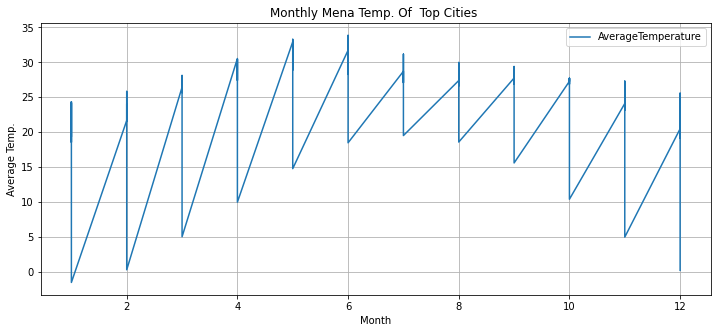

In [44]:
top_cities.plot(figsize=(12,5))
plt.title('Monthly Mena Temp. Of  Top Cities ')
plt.ylabel('Average Temp.')
plt.grid(True)

### Data Aggregated per Year¶
Mean temperatures in Indian cities by Year

In [45]:
mean_yearly=india.groupby([india.index.year.rename('Year'),india.City])['AverageTemperature'].mean().reset_index()
mean_yearly.head(10)

,Year,City,AverageTemperature
0,1796,Achalpur,25.608000
1,1796,Adilabad,26.951833
2,1796,Adoni,26.904417
3,1796,Agartala,24.787333
4,1796,Agra,25.050833
5,1796,Ahmadabad,26.350917
6,1796,Ahmadnagar,24.390583
7,1796,Aizawl,22.707583
8,1796,Ajmer,25.247917
9,1796,Akola,26.314167


### Plotting the graph for top_cities of India¶

In [46]:
top_cities_yearly = mean_yearly[mean_yearly.City.isin(['Ahmadabad', 'Calcutta', 'Madras','New Delhi', 'Bombay', 'Srinagar'])]
top_cities_yearly = top_cities_yearly.set_index('Year')
top_cities_yearly.head()

,City,AverageTemperature
Year,,
1796,Ahmadabad,26.350917
1796,Bombay,26.397833
1796,Calcutta,25.886250
1796,Madras,27.991833
1796,New Delhi,25.030250


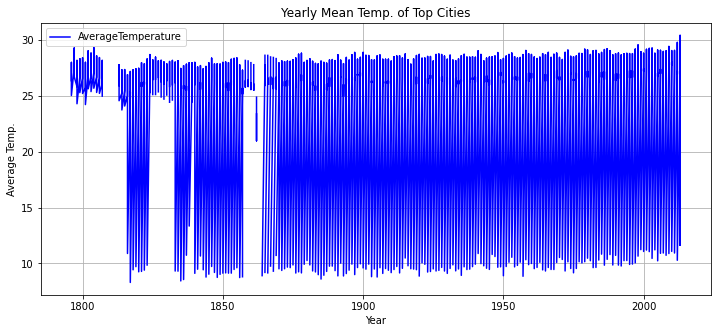

In [48]:
top_cities_yearly.plot(color ='blue',figsize=(12,5))
plt.title('Yearly Mean Temp. of Top Cities')
plt.ylabel('Average Temp.')
plt.grid(True)

### Handling missing data
The dataframe India_mean_temperature_yearly has many NaN values in the column AverageTemperature. That leads the the plot with broken lines.

In [50]:
top_cities_yearly=top_cities_yearly.fillna(top_cities_yearly.mean())
top_cities_yearly.tail()

,City,AverageTemperature
Year,,
2013,Bombay,26.71300
2013,Calcutta,27.36925
2013,Madras,30.41175
2013,New Delhi,26.70925
2013,Srinagar,11.63975


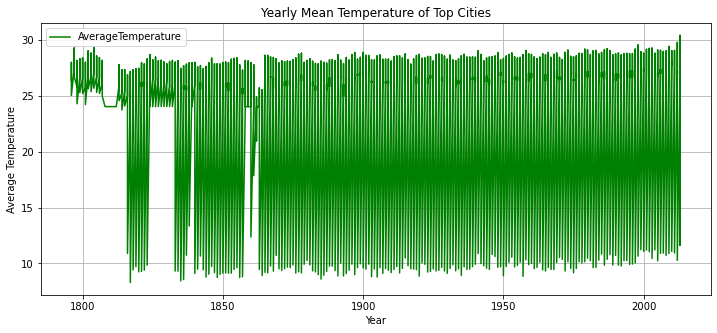

In [52]:
top_cities_yearly.plot(color = 'green',figsize =(12,5))
plt.title('Yearly Mean Temperature of Top Cities')
plt.ylabel("Average Temperature")
plt.grid(True)

### Trend in Global Temperature

In [58]:
global_=global_.set_index('dt')
global_.index=pd.to_datetime(global_.index)
global_ =global_.resample('A').mean()
global_.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-12-31,8.719364,2.637818,NaN,NaN,NaN,NaN,NaN,NaN
1751-12-31,7.976143,2.781143,NaN,NaN,NaN,NaN,NaN,NaN
1752-12-31,5.779833,2.977000,NaN,NaN,NaN,NaN,NaN,NaN
1753-12-31,8.388083,3.176000,NaN,NaN,NaN,NaN,NaN,NaN
1754-12-31,8.469333,3.494250,NaN,NaN,NaN,NaN,NaN,NaN


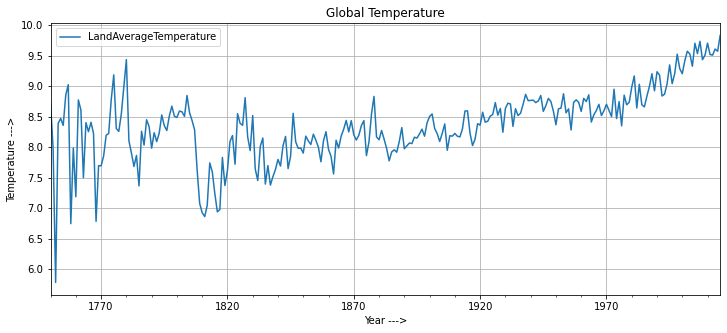

In [60]:
x = global_.loc[:,['LandAverageTemperature']]
x.plot(figsize =(12,5))
plt.title('Global Temperature')
plt.xlabel("Year --->")
plt.ylabel("Temperature --->")
plt.grid(True)

#### The global mean temperature graph is definitely showing an upward trend. We can use the dataframe country to further evaluate whether the upward trend is uniform or contributed by some selected countries.

## Countries with Minimum and Maximum temperature difference over years

In [62]:
country=country.set_index('dt')
country.index=pd.to_datetime(country.index)
country.head()

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,4.384,2.294,Åland
1743-12-01,NaN,NaN,Åland
1744-01-01,NaN,NaN,Åland
1744-02-01,NaN,NaN,Åland
1744-03-01,NaN,NaN,Åland


In [63]:
country_diff=country.groupby([country.index.year.rename('Year'),'Country']).AverageTemperature.mean().reset_index()
country_diff.head()

,Year,Country,AverageTemperature
0,1743,Albania,8.620
1,1743,Andorra,7.556
2,1743,Austria,2.482
3,1743,Belarus,0.767
4,1743,Belgium,7.106


In [64]:
country_diff=country_diff.groupby(['Country']).AverageTemperature.agg(['max','min']).reset_index()
country_diff['diff']=country_diff['max']-country_diff['min']
country_diff.head()

,Country,max,min,diff
0,Afghanistan,18.379571,12.547167,5.832405
1,Africa,25.472500,23.036000,2.436500
2,Albania,14.993875,5.588250,9.405625
3,Algeria,25.215667,10.343000,14.872667
4,American Samoa,27.537917,25.667167,1.870750


### Plotting the AverageTemperature for top 10 countries with the highest temperature difference:

In [65]:
country_list_max = country_diff.nlargest(10, columns = 'diff')
country_list_max

,Country,max,min,diff
39,Canada,0.792714,-22.616000,23.408714
180,Russia,-1.628333,-21.342000,19.713667
115,Kazakhstan,8.937250,-8.789000,17.726250
159,North America,6.436000,-11.192667,17.628667
119,Kuwait,27.638667,12.020000,15.618667
234,Uzbekistan,16.188250,0.848000,15.340250
232,United States,12.231000,-2.774667,15.005667
225,Turkmenistan,18.613500,3.693000,14.920500
3,Algeria,25.215667,10.343000,14.872667
114,Jordan,22.228000,7.854500,14.373500


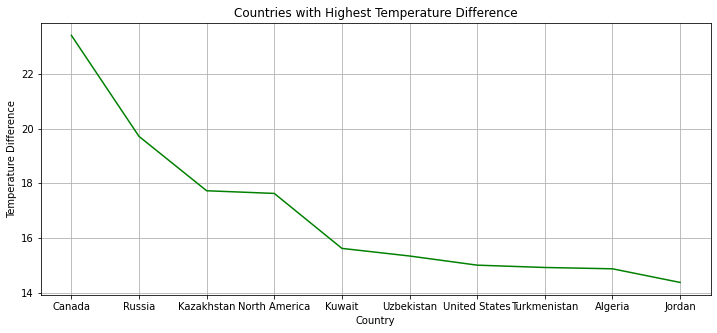

In [67]:
plt.figure(figsize=(12,5))
plt.title('Countries with Highest Temperature Difference')
plt.xlabel('Country')
plt.ylabel('Temperature Difference')
plt.plot(country_list_max['Country'],country_list_max['diff'],color='g')
plt.grid(True)

### Plotting the AverageTemperature for top 10 countries with the lowest temperature difference: 

In [68]:
country_list_min = country_diff.nsmallest(10, columns = 'diff')
country_list_min

,Country,max,min,diff
91,Guam,27.778417,26.144083,1.634333
161,Northern Mariana Islands,27.778417,26.144083,1.634333
166,Palau,28.006417,26.262667,1.743750
170,Papua New Guinea,25.419750,23.608917,1.810833
201,Somalia,27.975625,26.159083,1.816542
200,Solomon Islands,27.586250,25.755417,1.830833
203,South America,22.857000,21.024917,1.832083
188,Samoa,27.236667,25.388000,1.848667
4,American Samoa,27.537917,25.667167,1.870750
73,Federated States Of Micronesia,27.997250,26.121250,1.876000


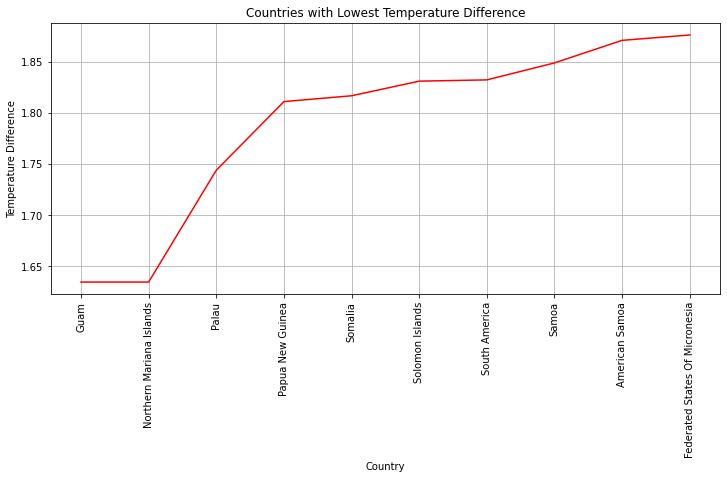

In [70]:
plt.figure(figsize=(12,5))
plt.title('Countries with Lowest Temperature Difference')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Temperature Difference')
plt.plot(country_list_min['Country'],country_list_min['diff'],color='r')
plt.grid(True)

#### The increase in temperature is not very evident in both the plots. Also the data doesn't seem to be very reliable. 

#### So repeating the exercise by first filtering the dataframe country to only represent data after 1900.¶

## Plotting the averageTemperature for countries with the highest temperature difference

In [71]:
country_filtered=country.groupby([country.index.year.rename('Year'),'Country']).AverageTemperature.mean().reset_index()
country_filtered=country_filtered[country_filtered['Year']>=1900]
country_filtered=country_filtered.groupby(['Country']).AverageTemperature.agg(['max','min']).reset_index()
country_filtered['diff']=country_filtered['max']-country_filtered['min']
country_filtered.head()

,Country,max,min,diff
0,Afghanistan,16.533625,12.547167,3.986458
1,Africa,25.472500,23.330083,2.142417
2,Albania,14.993875,11.582500,3.411375
3,Algeria,25.215667,22.171583,3.044083
4,American Samoa,27.537917,25.853500,1.684417


In [72]:
country_list_max = country_filtered.nlargest(10, columns = 'diff')
country_list_max

,Country,max,min,diff
210,Svalbard And Jan Mayen,-3.781000,-9.682667,5.901667
234,Uzbekistan,16.188250,10.626417,5.561833
225,Turkmenistan,18.613500,13.112583,5.500917
115,Kazakhstan,8.937250,3.723750,5.213500
39,Canada,-1.640667,-6.802917,5.162250
228,Ukraine,10.913500,5.811167,5.102333
88,Greenland,-15.409750,-20.446833,5.037083
75,Finland,4.064125,-0.962417,5.026542
58,Denmark,-14.927250,-19.857750,4.930500
144,Mongolia,2.807750,-2.023000,4.830750


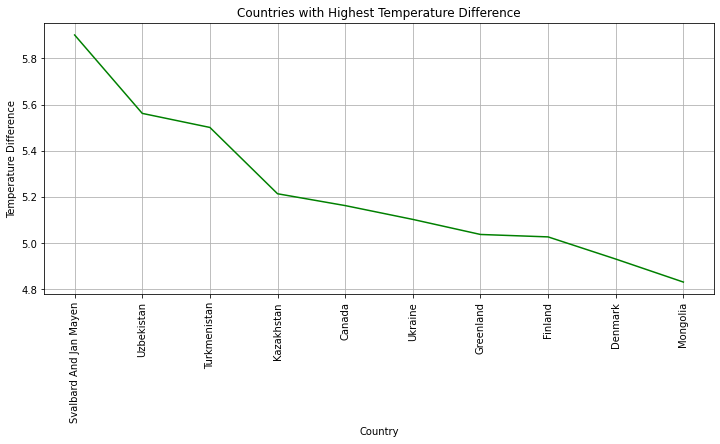

In [73]:
plt.figure(figsize=(12,5))
plt.title('Countries with Highest Temperature Difference')
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Temperature Difference')
plt.plot(country_list_max['Country'],country_list_max['diff'],color='g')
plt.grid(True)

### Plotting the averageTemperature for countries with the lowest temperature difference.

In [74]:
country_list_min = country_filtered.nsmallest(10, columns = 'diff')
country_list_min

,Country,max,min,diff
44,Chile,10.337000,8.869750,1.467250
207,Sri Lanka,28.175125,26.590000,1.585125
166,Palau,28.006417,26.391333,1.615083
91,Guam,27.778417,26.144083,1.634333
161,Northern Mariana Islands,27.778417,26.144083,1.634333
188,Samoa,27.236667,25.593583,1.643083
4,American Samoa,27.537917,25.853500,1.684417
178,Reunion,24.380500,22.660833,1.719667
104,Indonesia,26.754750,25.029333,1.725417
201,Somalia,27.975625,26.234250,1.741375


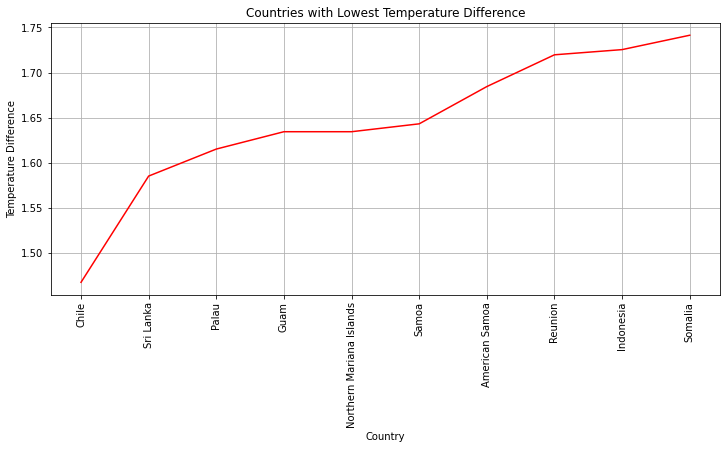

In [75]:
plt.figure(figsize=(12,5))
plt.title('Countries with Lowest Temperature Difference')
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Temperature Difference')
plt.plot(country_list_min['Country'],country_list_min['diff'],color='r')
plt.grid(True)

#### The countries on Nothern and southern hemispheres seems to have witnessed significantly more global warming compared to the tropical countries.

## Temperature Comparison of Developed Vs. Developing nations:

In [76]:
developed = ['United States', 'United Kingdom', 'France', 'Germany', 'Japan', 'Canada', 'Switzerland', 'Norway', 'Sweden', 'South Korea', 'Australia']
developed_df=country[country.Country.isin(developed)]
developed_df=developed_df.groupby([developed_df.index.year.rename('Year'),'Country']).AverageTemperature.mean().reset_index()
developed_df.head()

,Year,Country,AverageTemperature
0,1743,France,10.203
1,1743,Germany,5.468
2,1743,Norway,-3.503
3,1743,Sweden,-1.444
4,1743,Switzerland,3.572


In [77]:
developing = ['China', 'India', 'Columbia', 'Brazil', 'Mexico', 'Indonesia', 'Philippines', 'Maldives', 'Turkey', 'South Africa', 'Libya']
developing_df=country[country.Country.isin(developing)]
developing_df=developing_df.groupby([developing_df.index.year.rename('Year'),'Country']).AverageTemperature.mean().reset_index()
developing_df.head()

,Year,Country,AverageTemperature
0,1777,Turkey,12.688500
1,1778,Turkey,11.931250
2,1779,Turkey,12.031333
3,1780,Turkey,12.248333
4,1781,Turkey,11.669083


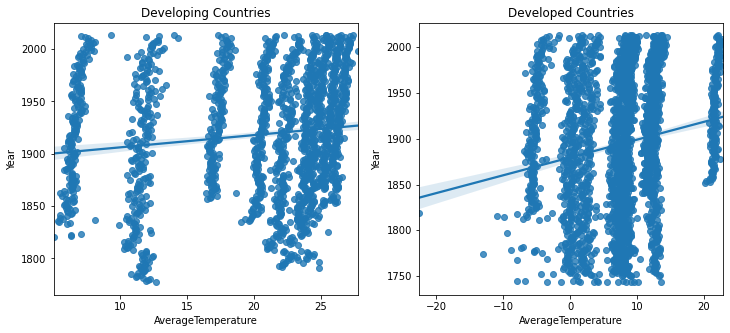

In [82]:
fig, axs = plt.subplots(ncols=2,figsize=(12,5))
sns.regplot(x='AverageTemperature',y='Year',fit_reg=True,data=developing_df, ax=axs[0])
axs[0].set(title = 'Developing Countries')
sns.regplot(x='AverageTemperature',y='Year',fit_reg=True,data=developed_df, ax=axs[1])
axs[1].set(title ='Developed Countries');

## Predicting temperature using Linear regression for Developing Countries

In [83]:
developing_df= developing_df[developing_df['Year'] > 1900]

x=developing_df['Year'].values.reshape(-1,1)
y=developing_df['AverageTemperature']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.linear_model import LinearRegression
regr=LinearRegression()
regr.fit(x_train,y_train)

y_pred_1=regr.predict(x_test)
y_pred_1

array([19.77962655, 19.60692046, 20.4795407 , 20.51589988, 20.42500194,
       19.53420211, 19.77053676, 20.26138564, 19.56147149, 20.02505099,
       20.06141017, 20.39773255, 19.57965108, 19.61601026, 20.4795407 ,
       19.91597346, 20.27956523, 19.63418985, 19.65236943, 20.16139791,
       20.46136111, 20.55225905, 20.20684688, 19.77962655, 20.00687141,
       19.98869182, 20.05232038, 19.60692046, 20.37955296, 20.34319379,
       20.3250142 , 19.5432919 , 20.51589988, 19.97960202, 20.1704877 ,
       20.36137338, 20.25229585, 20.1704877 , 20.09776935, 19.73417758,
       19.56147149, 20.1704877 , 19.58874087, 19.88870408, 19.67054902,
       20.03414079, 19.94324285, 20.46136111, 19.79780614, 19.93415305,
       20.1704877 , 19.84325511, 20.46136111, 20.55225905, 20.37046317,
       20.35228358, 19.78871635, 20.31592441, 20.47045091, 20.11594893,
       19.8523449 , 20.30683461, 19.64327964, 19.83416532, 20.49772029,
       19.80689593, 19.82507552, 19.62510005, 19.8523449 , 20.04

### coefficient and intercept for developing_df

In [85]:
regr.coef_,regr.intercept_

(array([0.00908979]), 2.2545034444454224)

## Predicting the temperatures in developing countries in the year 2025

In [86]:
regr.predict([[2025]])

array([20.66133658])

## Predicting temperature using Linear regression for Developed Countries

In [90]:
developed_df = developed_df[developed_df['Year'] > 1900]

x = developed_df['Year'].values.reshape(-1,1)
y = developed_df['AverageTemperature']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(x_train, y_train)

y_pred_2 = regr.predict(x_test)
y_pred_2

array([9.25956093, 7.83009313, 7.90085886, 8.84911968, 7.68856166,
       9.14633575, 9.07557002, 8.24053438, 8.26884067, 8.62266933,
       8.86327282, 8.82081338, 7.7310211 , 7.67440852, 8.07069662,
       8.21222808, 8.60851619, 8.07069662, 8.3679127 , 7.91501201,
       8.29714696, 8.45283158, 8.12730921, 8.60851619, 8.46698472,
       8.46698472, 7.90085886, 9.08972317, 8.73589451, 7.84424628,
       9.21710149, 8.08484977, 8.14146235, 9.08972317, 7.74517425,
       8.99065114, 8.41037214, 8.84911968, 7.98577774, 8.25468752,
       8.56605675, 9.04726373, 8.7642008 , 7.67440852, 8.16976865,
       9.25956093, 8.82081338, 7.77348054, 8.69343507, 8.22638123,
       7.7310211 , 8.52359731, 8.5519036 , 9.24540778, 8.42452528,
       7.71686796, 8.18392179, 8.50944416, 9.23125463, 8.75004765,
       8.22638123, 9.06141688, 8.83496653, 8.976498  , 8.24053438,
       9.14633575, 8.976498  , 7.85839942, 8.19807494, 8.05654347,
       7.68856166, 9.00480429, 8.99065114, 9.14633575, 8.62266

### coefficient and intercept for developed_df

In [92]:
regr.coef_,regr.intercept_

(array([0.01415315]), -19.23072299845706)

## Predicting the temperatures in developed countries in the year 2025

In [93]:
regr.predict([[2025]])

array([9.42939868])